In [3]:
### Visualizing variables in a few different (rudimentary) ways
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd # geospatial data processing
import matplotlib.pyplot as plt # standard plotting packages
import seaborn as sns

import os 
path = '~/coding/water_pumps/Data/'
# Reading the files
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
labels = pd.read_csv(path+'train_labels.csv')
print('Packages loaded')

Packages loaded


In [4]:
# first transformation: take logs of tsh
log_tsh = np.log(train.amount_tsh)
# merge the status data, let's see how the categorical varibles line up with it
train = pd.merge(train, labels, on='id')

# I also want to try this without 0
train['construction_year'] = train['construction_year'].replace(0, np.NaN) 
train['population'] = train['population'].replace(0, np.NaN) 
train['amount_tsh'] = train['amount_tsh'].replace(0, np.NaN)
train['gps_height'] = train['gps_height'].replace(0, np.NaN)

/usr/lib/python3/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


After fighting with matplotlib, I have a log(2) scale for population. It's not perfect, but here is a decent example of the numerical variables. It seems like taking logs of tsh was the right plan, but we'll see if there are enough observations to make a difference. 

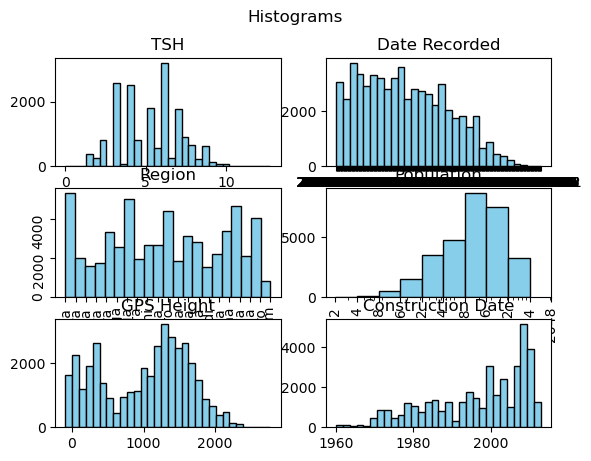

In [12]:
# Making histograms

fig, ((ax1, ax3), (ax2, ax4), (ax5,ax6)) = plt.subplots(3, 2) # note that 2 and 3 are swpped
fig.suptitle('Histograms')
ax1.hist(log_tsh, bins=30, color='skyblue', edgecolor='black', range=(0, max(log_tsh)))
ax1.set_title('TSH')
ax2.hist(train.region, bins=21, color='skyblue', edgecolor='black')
ax2.tick_params(rotation=90)
ax2.set_title('Region')
ax3.hist(train.date_recorded, bins=30, color='skyblue', edgecolor='black')
ax3.set_title('Date Recorded')
xbins = np.geomspace(2, 1024, num=10)
xbins = np.concatenate(xbins,40000)
ax4.hist(train.population, bins=xbins, color='skyblue', edgecolor='black')
ax4.set_xticks(np.geomspace(2, 2048, num=11))
ax4.set_xscale('log')
xticks = np.geomspace(2, 2048, num=11)
xlabels = [f'{x:1.0f}' for x in xticks]
ax4.set_xticks(xticks, labels=xlabels, rotation = 90) 
ax4.set_title('Population')
ax5.hist(train.gps_height, bins=30, color='skyblue', edgecolor='black')
ax5.set_title('GPS Height')
ax6.hist(train.construction_year, bins=30, color='skyblue', edgecolor='black')
ax6.set_title('Construction Date')
plt.show()

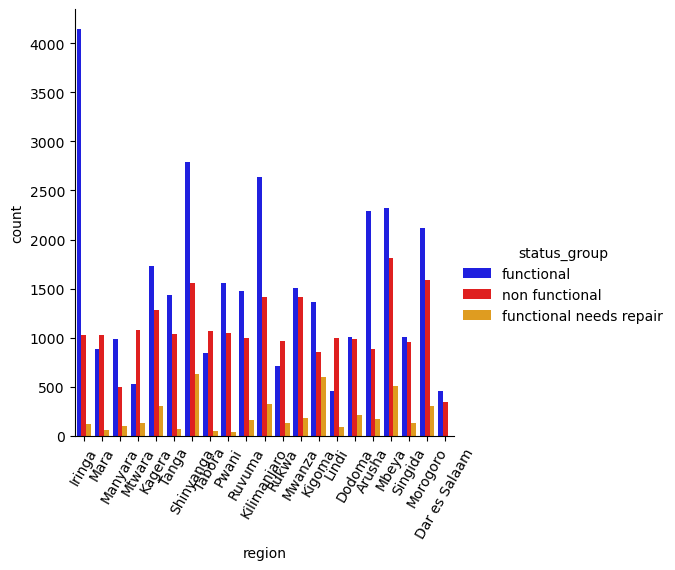

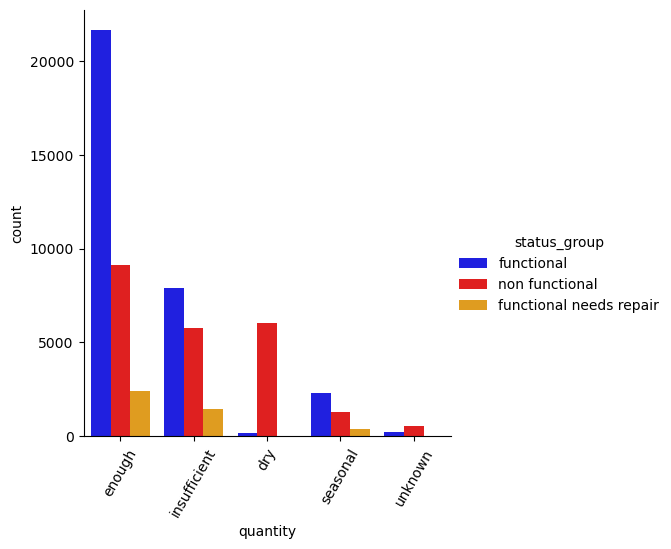

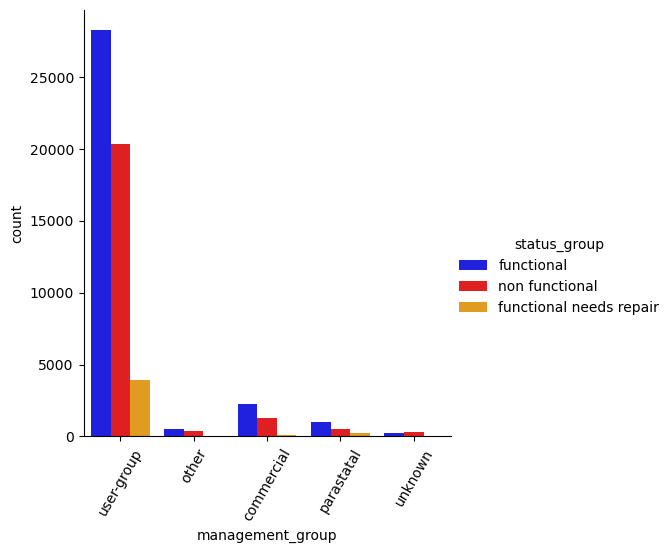

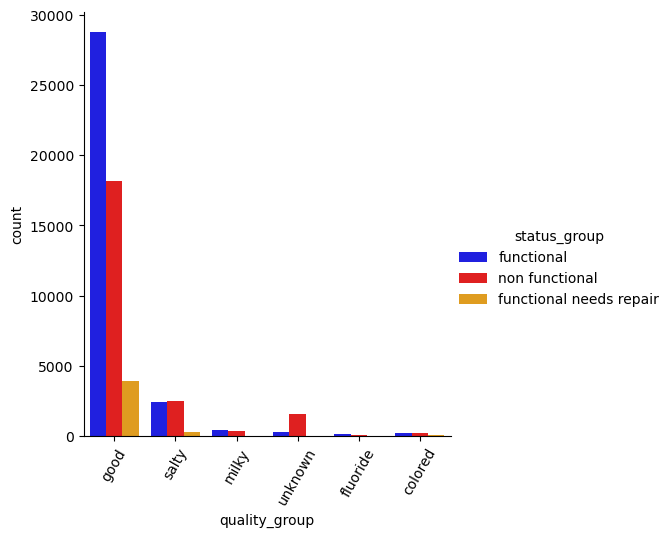

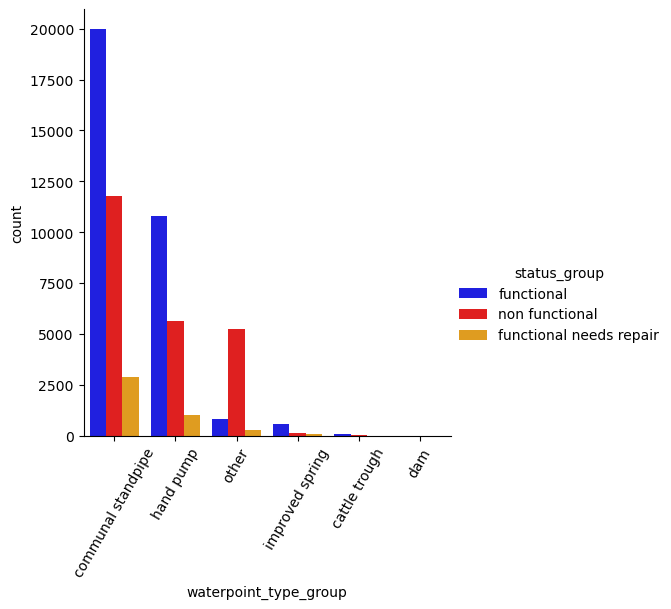

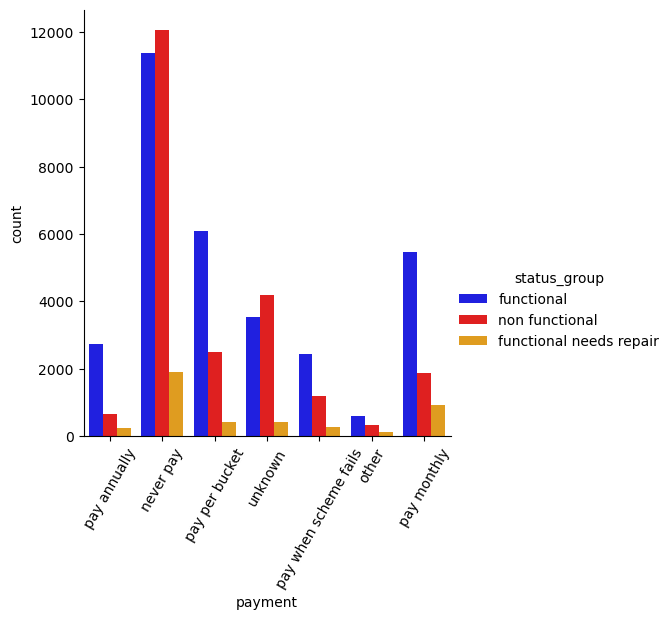

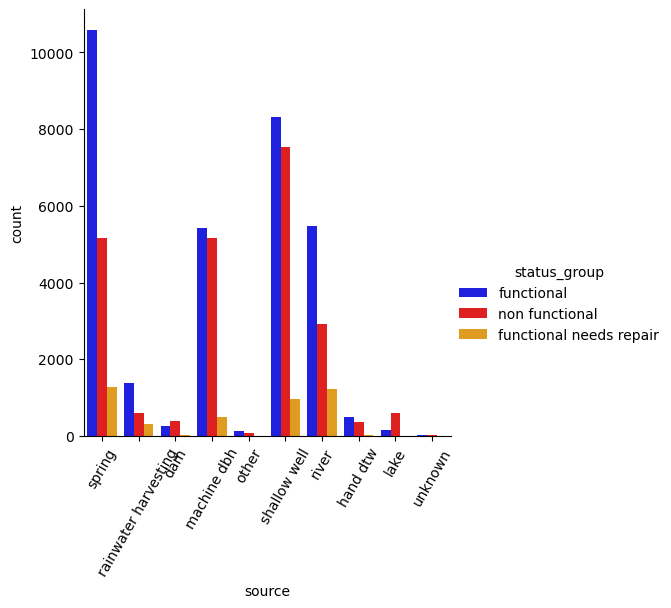

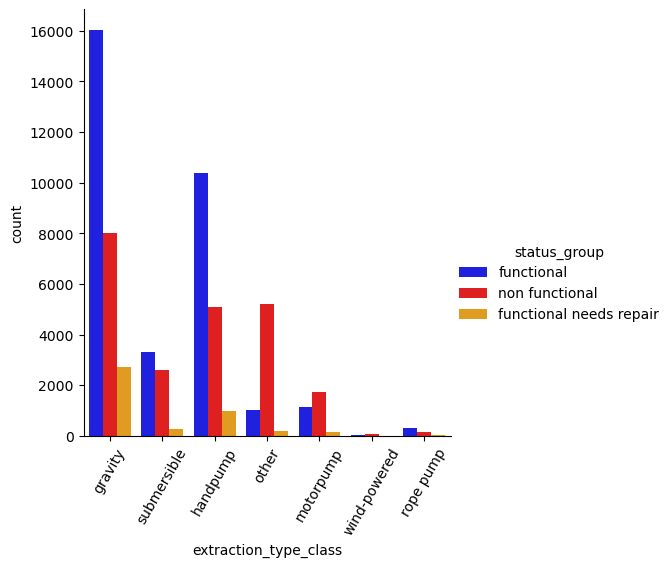

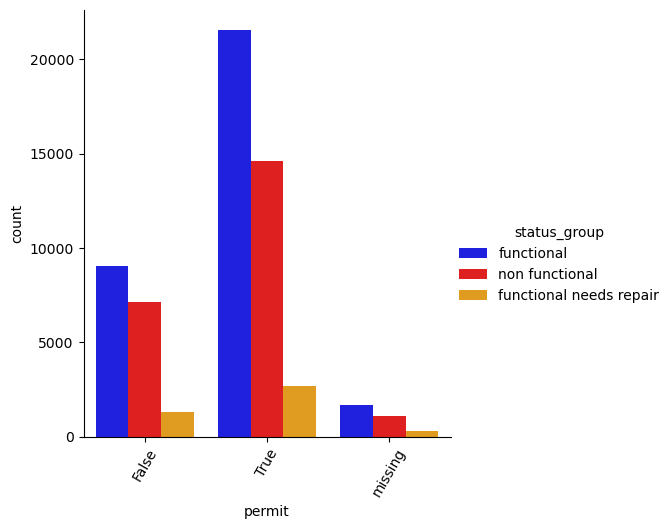

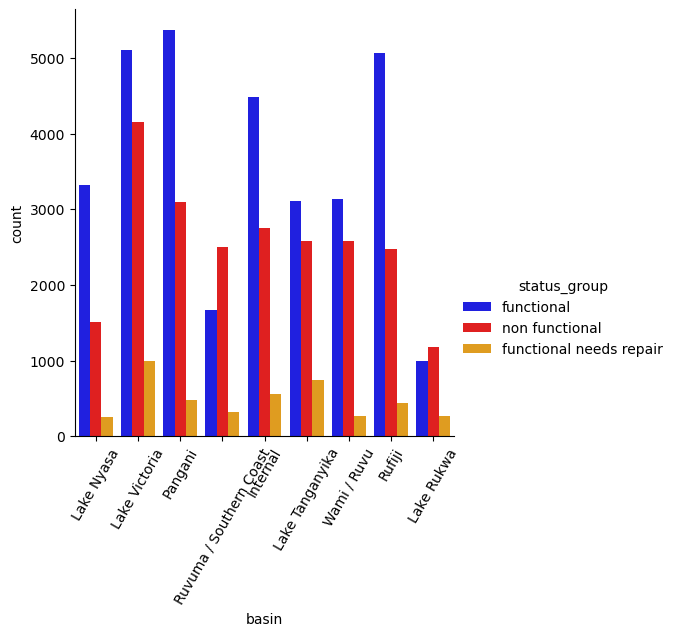

In [41]:
# Categorical values
# I've chosen these as the more interesting variables, but we can look at others
catvars = ('region','quantity','management_group','quality_group','waterpoint_type_group','payment','source','extraction_type_class','permit','basin')

# First, let's encode missing values as a string so that they show up here
train = train.fillna('missing')

for n, name in enumerate(catvars): 
    name = sns.catplot(x=train[name], kind='count', hue=train.status_group, palette=['blue', 'red', 'orange'])
    plt.xticks(rotation=60)

plt.show()

Thoughts:
* Some regions seem to have much better luck than others
* `quantity` could be a useful binary (enough, else), or even three?
* `management_group` does not seem to have an effect on the distribution. Nor does `permit`
* `quality_group` does not seem to bring much, as there are probably not enough "bad" observations. Similar with `waterpoint_type_group` (maybe?), `extraction_type_class`
* There's a strong case for a binary `payment` variable. Also `source`
* The watershed variabe `basin` might be good but may simply reflect seasonality captured in `quantity`
